In [540]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import pickle

In [541]:
pf = pd.read_csv('../Data/median_data.csv')
print(pf)

     Unnamed: 0     video id  Question 2: Sound (1-5)  \
0             0  3gJ_14U5mdY                      4.0   
1             1  r1BzB2-Cx7k                      3.0   
2             2  otns7IbEAaY                      3.0   
3             3  pCh4iq0kj3g                      4.0   
4             4  cTOaJzEgXmg                      3.0   
..          ...          ...                      ...   
130         130  8yBn-c8__Tk                      2.0   
131         131  QXGyszq4pic                      3.0   
132         132  QXR-hOL5fFs                      3.0   
133         133  iGgDCb7ZVdA                      3.0   
134         134  bPkoL622W1U                      3.0   

     Question 2.1: Music (1-5)  Question 2.2 : Noise control (1-5)  \
0                          4.0                                 4.0   
1                          4.0                                 2.0   
2                          4.0                                 2.0   
3                          4.0     

<AxesSubplot:xlabel='Attractive Level (1-5)', ylabel='Count'>

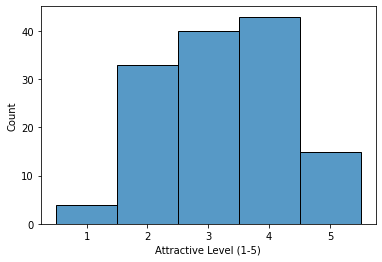

In [542]:
sns.histplot(pf['Attractive Level (1-5)'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])

In [543]:
# for x in pf.columns:
#     try:
#         plt.plot(pf[x],pf["Attractive Level (1-5)"], 'ro')
#         plt.show()
#     except:
#         pass

In [544]:
columns = [
       'Question 2: Sound (1-5)', 'Question 2.1: Music (1-5)',
       'Question 2.2 : Noise control (1-5)',
       'Question 2.3 : Speaking Style (1-5)', 'Question 3: Camera (1-5)',
       'Question 3.1: Stable (1-5)', 'Question 3.2: Angel diversity (0-1)',
       'Question 4: Images (1-5)', 'Question 4.1: Resolution (1-5)',
       'Question 4.2: Color (1-5)', 'Question 5: Content (1-5)',
       'Question 5.1: Introduction (0-1)',
       'Question 5.2: Food description (0-1)', 'Question 6: Reviewer (1-5)',
       'Question 6.1: Reviewer emotion is negative - neutral - positive (1-3)',
       'Question 6.2: Recommendation (0-1)',
       'Question 6.3: Clear information (0-1)']
core_columns = [
       'Question 2: Sound (1-5)','Question 3: Camera (1-5)',
       'Question 4: Images (1-5)', 'Question 5: Content (1-5)',
       'Question 6: Reviewer (1-5)',]
output_column = 'Attractive Level (1-5)'

In [545]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=2, random_state=0)
X, y = oversample.fit_resample(pf[core_columns][:], pf[output_column][:])
# X, y = pf[core_columns][:], pf[output_column][:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(X_train.shape)
print(X_test.shape)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f478b81d280>
Traceback (most recent call last):
  File "/home/nghiatnh/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/nghiatnh/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/nghiatnh/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/nghiatnh/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


(172, 5)
(43, 5)


(215, 5)
(215,)
     Question 2: Sound (1-5)  Question 3: Camera (1-5)  \
67                       2.0                  2.000000   
107                      2.0                  2.000000   
113                      2.0                  2.000000   
124                      2.0                  1.000000   
135                      2.0                  1.129913   

     Question 4: Images (1-5)  Question 5: Content (1-5)  \
67                        3.0                   1.000000   
107                       3.0                   1.000000   
113                       3.0                   3.000000   
124                       3.0                   2.000000   
135                       3.0                   2.129913   

     Question 6: Reviewer (1-5)  
67                          2.0  
107                         2.0  
113                         2.0  
124                         2.0  
135                         2.0  


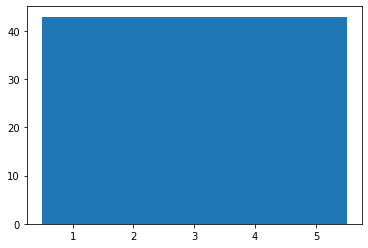

In [546]:
print(X.shape)
print(y.shape)
plt.hist(y, bins=[0.5,1.5,2.5,3.5,4.5,5.5])
print(X[y == 1].head())

In [547]:
from sklearn import tree
def DT():
    clf = tree.DecisionTreeClassifier(max_depth = 5)
    clf.fit(X_train, y_train)
    pickle.dump(clf, open('./Decision_Tree_model', 'wb'))
    return (f1_score(clf.predict(X_train), y_train, average='macro'), f1_score(clf.predict(X_test), y_test, average='macro'))

result = DT()
print('Decision tree:')
print('train f1: ', result[0])
print('test f1: ', result[1])


Decision tree:
train accuracy:  0.8628413499784753
test accuracy:  0.7677146042363434


In [548]:
from sklearn.linear_model import LogisticRegression
def LoR():
    clf = LogisticRegression(C=1, solver="lbfgs", max_iter=1e4)
    y1 = y_train.copy()
    y1[y1 < 3] = 0
    y1[y1 >= 3] = 1
    y2 = y_test.copy()
    y2[y2 < 3] = 0
    y2[y2 >= 3] = 1
    clf.fit(X_train, y1)
    pickle.dump(clf, open('./Logistic_Regression_model', 'wb'))
    return (f1_score(clf.predict(X_train), y1, average='macro'), f1_score(clf.predict(X_test), y2, average='macro'))

result = LoR()
print('Logistic Regression:')
print('train f1: ', result[0])
print('test f1: ', result[1])

Logistic Regression:
train accuracy:  0.8880208333333333
test accuracy:  0.9057017543859649


In [561]:
from sklearn.linear_model import LinearRegression

def LiR():
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    pickle.dump(clf, open('./Linear_Regression_model', 'wb'))

    score1 = f1_score(clf.predict(X_train).round(), y_train, average='macro')
    score2 = f1_score(clf.predict(X_test).round(), y_test, average='macro')
    return (score1, score2)

result = LiR()
print('Linear Regression:')
print('train f1: ', result[0])
print('test f1: ', result[1])

Linear Regression:
train accuracy:  0.768635542860895
test accuracy:  0.8269005847953217


In [555]:
from sklearn.neural_network import MLPClassifier

def MLP():
    clf = MLPClassifier(random_state=1, max_iter=10000, hidden_layer_sizes=(500,))
    clf.fit(X_train, y_train)
    pickle.dump(clf, open('./MLP_model', 'wb'))
    return (f1_score(clf.predict(X_train), y_train, average='macro'), f1_score(clf.predict(X_test), y_test, average='macro'))

result = MLP()
print('Multilayer Perceptron:')
print('train f1: ', result[0])
print('test f1: ', result[1])

Multilayer Perceptron:
train accuracy:  0.941244159413651
test accuracy:  0.7485183547103051


In [551]:
from sklearn.svm import SVC

def SVM():
    clf = SVC(C=1)
    clf.fit(X_train, y_train)
    pickle.dump(clf, open('./SVM_model', 'wb'))

    return (f1_score(clf.predict(X_train), y_train, average='macro'), f1_score(clf.predict(X_test), y_test, average='macro'))

result = SVM()
print('Support Vector Machine:')
print('train f1: ', result[0])
print('test f1: ', result[1])


Support Vector Machine:
train accuracy:  0.8608819962459412
test accuracy:  0.7573174197215118


In [552]:
from sklearn.neighbors import KNeighborsClassifier

def KNN():
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)
    pickle.dump(clf, open('./KNN_model', 'wb'))

    return (f1_score(clf.predict(X_train), y_train, average='macro'), f1_score(clf.predict(X_test), y_test, average='macro'))

result = KNN()
print('K-Nearest Neighbors:')
print('train f1: ', result[0])
print('test f1: ', result[1])


K-Nearest Neighbors:
train accuracy:  0.8439899720423842
test accuracy:  0.6591025641025641


In [553]:
N = 100
DT_ = []
LoR_ = []
LiR_ = []
MLP_ = []
SVM_ = []
KNN_ = []
for i in range(N):
    oversample = SMOTE(k_neighbors=3)
    X, y = oversample.fit_resample(pf[core_columns][:], pf[output_column][:])
    # X, y = pf[core_columns][:], pf[output_column][:]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
    DT_.append(DT())
    LoR_.append(LoR())
    LiR_.append(LiR())
    MLP_.append(MLP())
    SVM_.append(SVM())
    KNN_.append(KNN())

print('DT: {}'.format(np.mean(DT_, axis = 0)))
print('LoR: {}'.format(np.mean(LoR_, axis = 0)))
print('LiR: {}'.format(np.mean(LiR_, axis = 0)))
print('MLP: {}'.format(np.mean(MLP_, axis = 0)))
print('SVM: {}'.format(np.mean(SVM_, axis = 0)))
print('KNN: {}'.format(np.mean(KNN_, axis = 0)))

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f4764dc6f70>
Traceback (most recent call last):
  File "/home/nghiatnh/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/nghiatnh/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/nghiatnh/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/nghiatnh/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<loc

DT: [0.85744345 0.71152502]
LoR: [0.90098384 0.88246588]
LiR: [0.7998302  0.78017688]
MLP: [0.91676537 0.75625829]
SVM: [0.8520035  0.76816509]
KNN: [0.82180965 0.73244656]
